In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from pandas import Series, DataFrame

%matplotlib inline

In [2]:
result_df = pd.read_csv('2016-us-ge-by-county.csv')
result_df.drop('StateCode', axis=1, inplace=True)
result_df.drop('CountyFips', axis=1, inplace=True)
result_df.head()

,StateName,CountyName,CountyTotalVote,Party,Candidate,VoteCount
0,alaska,Alaska,246588,GOP,Trump,130415.0
1,alabama,Macon,8748,GOP,Trump,1394.0
2,alabama,Wilcox,6095,GOP,Trump,1737.0
3,alabama,Coosa,5223,GOP,Trump,3376.0
4,alabama,Blount,25384,GOP,Trump,22808.0


In [3]:
# 提取Trump数据
trump_df = result_df[result_df['Candidate'] == 'Trump']
trump_df.info()
trump_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3113 entries, 0 to 3112
Data columns (total 6 columns):
StateName          3113 non-null object
CountyName         3113 non-null object
CountyTotalVote    3113 non-null int64
Party              3113 non-null object
Candidate          3113 non-null object
VoteCount          3113 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 170.2+ KB


,StateName,CountyName,CountyTotalVote,Party,Candidate,VoteCount
0,alaska,Alaska,246588,GOP,Trump,130415.0
1,alabama,Macon,8748,GOP,Trump,1394.0
2,alabama,Wilcox,6095,GOP,Trump,1737.0
3,alabama,Coosa,5223,GOP,Trump,3376.0
4,alabama,Blount,25384,GOP,Trump,22808.0


In [4]:
# Clinton
clinton_df = result_df[result_df['Candidate'] == 'Clinton']
clinton_df.info()
clinton_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3113 entries, 3113 to 6225
Data columns (total 6 columns):
StateName          3113 non-null object
CountyName         3113 non-null object
CountyTotalVote    3113 non-null int64
Party              3113 non-null object
Candidate          3113 non-null object
VoteCount          3113 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 170.2+ KB


,StateName,CountyName,CountyTotalVote,Party,Candidate,VoteCount
3113,alaska,Alaska,246588,DEM,Clinton,93007.0
3114,alabama,Macon,8748,DEM,Clinton,7237.0
3115,alabama,Wilcox,6095,DEM,Clinton,4329.0
3116,alabama,Coosa,5223,DEM,Clinton,1780.0
3117,alabama,Blount,25384,DEM,Clinton,2150.0


In [14]:
# 合并成一张表并却却按州分组
result_df = pd.merge(trump_df, clinton_df, 
                     on=['StateName', 'CountyName', 'CountyTotalVote'], 
                     suffixes=['_t', '_c'])
result_df.head()
result_df.drop('Party_t', axis=1, inplace=True)
result_df.drop('Party_c', axis=1, inplace=True)
result_df.drop('Candidate_t', axis=1, inplace=True)
result_df.drop('Candidate_c', axis=1, inplace=True)
result_df.columns = ['StateName', 'CountyName', 'TotalVote', 'VoteTrump', 'VoteClinton']
result_df = result_df.groupby(by=result_df['StateName'], as_index=False).sum() # 试下as_index不同值的区别
result_df.drop([8], inplace=True) # 删除district-of-columbia
result_df['T-Ratio'] = result_df['VoteTrump'] / result_df['TotalVote']
result_df['C-Ratio'] = result_df['VoteClinton'] / result_df['TotalVote']
result_df['Winner'] = list(map(lambda x, y: 'Trump' if x > y else 'Clinton', result_df['T-Ratio'], result_df['C-Ratio']))
print(result_df.head())
print(result_df['Winner'].value_counts())

    StateName  TotalVote  VoteTrump  VoteClinton   T-Ratio   C-Ratio   Winner
0     alabama    2078165  1306925.0     718084.0  0.628884  0.345538    Trump
1      alaska     246588   130415.0      93007.0  0.528878  0.377176    Trump
2     arizona    1960053   972900.0     888374.0  0.496364  0.453240    Trump
3    arkansas    1121684   677904.0     378729.0  0.604363  0.337643    Trump
4  california    8930459  2969532.0    5488261.0  0.332517  0.614555  Clinton
Trump      30
Clinton    20
Name: Winner, dtype: int64


In [70]:
# 收入数据来源：https://en.wikipedia.org/wiki/List_of_U.S._states_by_income
income_df = pd.read_csv('2015-us-income-by-county.csv')
income_df.info()
income_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
StateName    50 non-null object
Income       50 non-null int64
dtypes: int64(1), object(1)
memory usage: 880.0+ bytes


,StateName,Income
0,maryland,75847
1,hawaii,73486
2,alaska,73355
3,new-jersey,72222
4,connecticut,71346


In [93]:
# 合并收入数据
result_df = pd.merge(result_df, income_df, on=['StateName'])
result_df.head()

,StateName,TotalVote,VoteTrump,VoteClinton,T-Ratio,C-Ratio,Winner,Income
0,alabama,2078165,1306925.0,718084.0,0.628884,0.345538,Trump,44765
1,alaska,246588,130415.0,93007.0,0.528878,0.377176,Trump,73355
2,arizona,1960053,972900.0,888374.0,0.496364,0.453240,Trump,51492
3,arkansas,1121684,677904.0,378729.0,0.604363,0.337643,Trump,41995
4,california,8930459,2969532.0,5488261.0,0.332517,0.614555,Clinton,64500
5,colorado,2401267,1075770.0,1126384.0,0.448001,0.469079,Clinton,63909
6,connecticut,1528817,637919.0,823360.0,0.417263,0.538560,Clinton,71346
7,delaware,441535,185103.0,235581.0,0.419226,0.533550,Clinton,61255
8,florida,9386750,4605515.0,4485745.0,0.490640,0.477881,Trump,49426
9,georgia,4029564,2068623.0,1837300.0,0.513361,0.455955,Trump,51244


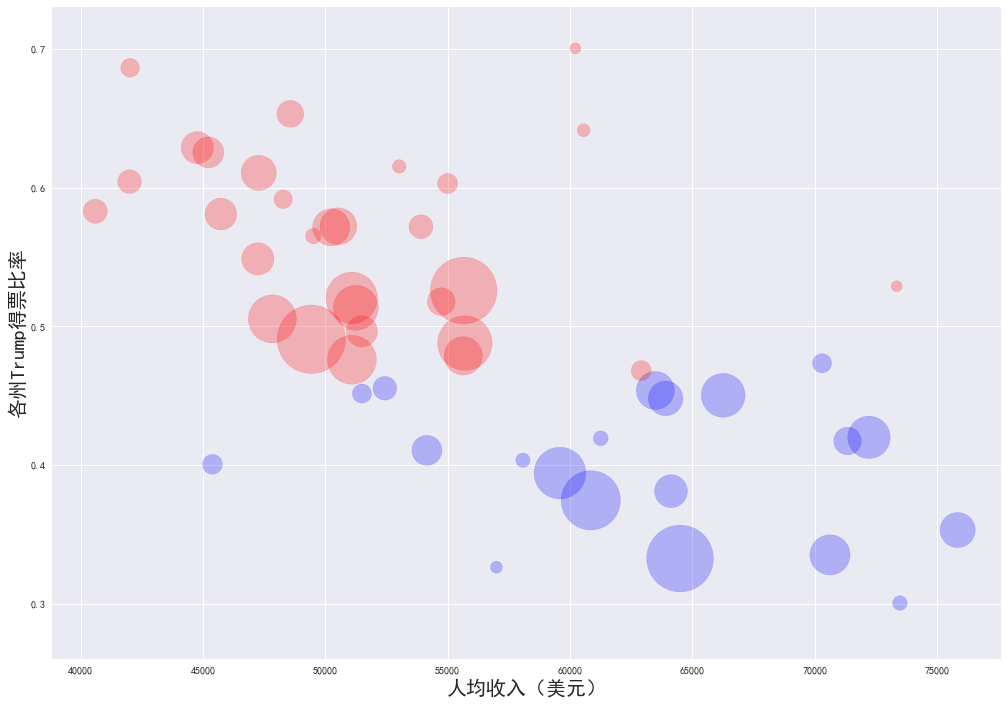

In [96]:
colors = result_df.Winner.map({'Trump':'Red', 'Clinton':'Blue'}) # 根据赢家设置颜色
spot_size = result_df.TotalVote / 2000.0 # 设置点大小
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.figure(figsize=(17, 12)) 
plt.scatter(x = result_df['Income'], 
            y = result_df['T-Ratio'],
            s=spot_size,
            c=colors,
            alpha=0.25)
# plt.scatter( x = result_df['Income'], y = result_df['T-Ratio'], s=spot_size, alpha=0.25)
plt.xlabel('人均收入（美元）',fontsize=20)
plt.ylabel('各州Trump得票比率',fontsize=20)
plt.grid(True) # 添加网格
plt.show()